In [1]:
library(scatterplot3d)
library(cluster)


Warning message:
"package 'cluster' was built under R version 3.4.3"

In [6]:
setwd("D:/Lancaster University/Modules/Statistical learning/files for practical worksheet and data files.-20180122") 
hyb=read.csv("hybrid_reg.csv")
head(hyb)

carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1
6,Insight,2001,19036.71,9.52,53.00,53.00,TS,7


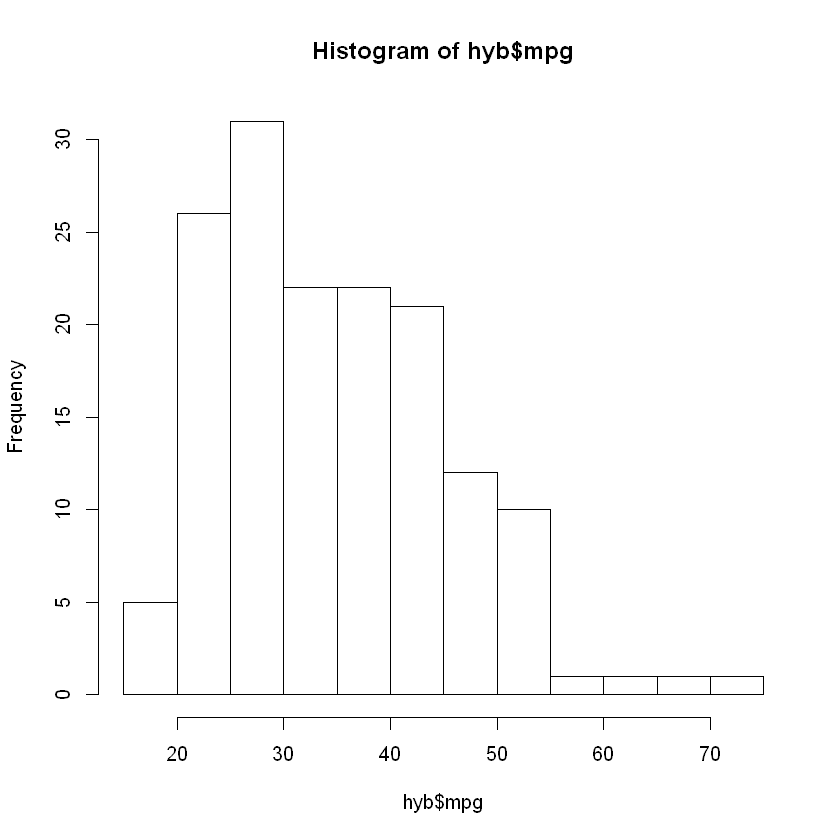

In [4]:
hist(hyb$mpg)

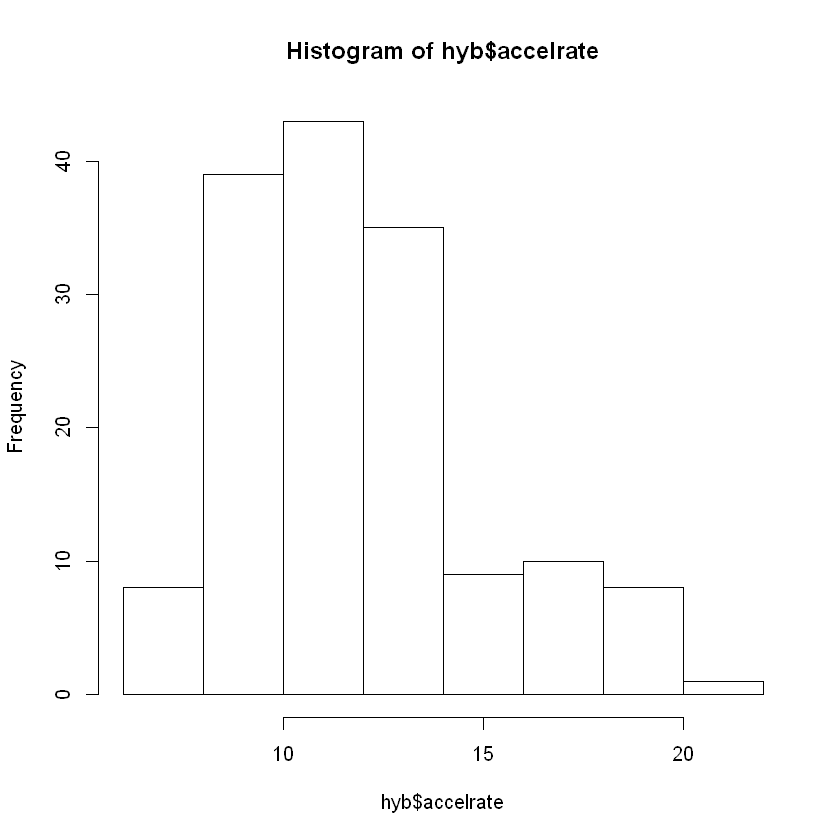

In [7]:
hist(hyb$accelrate)

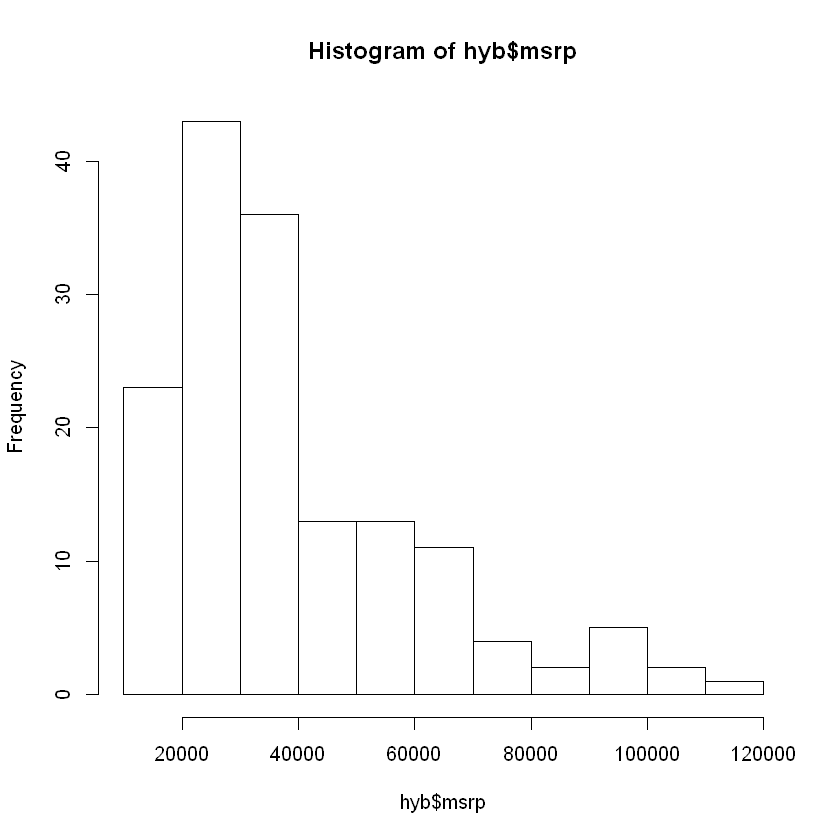

In [8]:
hist(hyb$msrp)

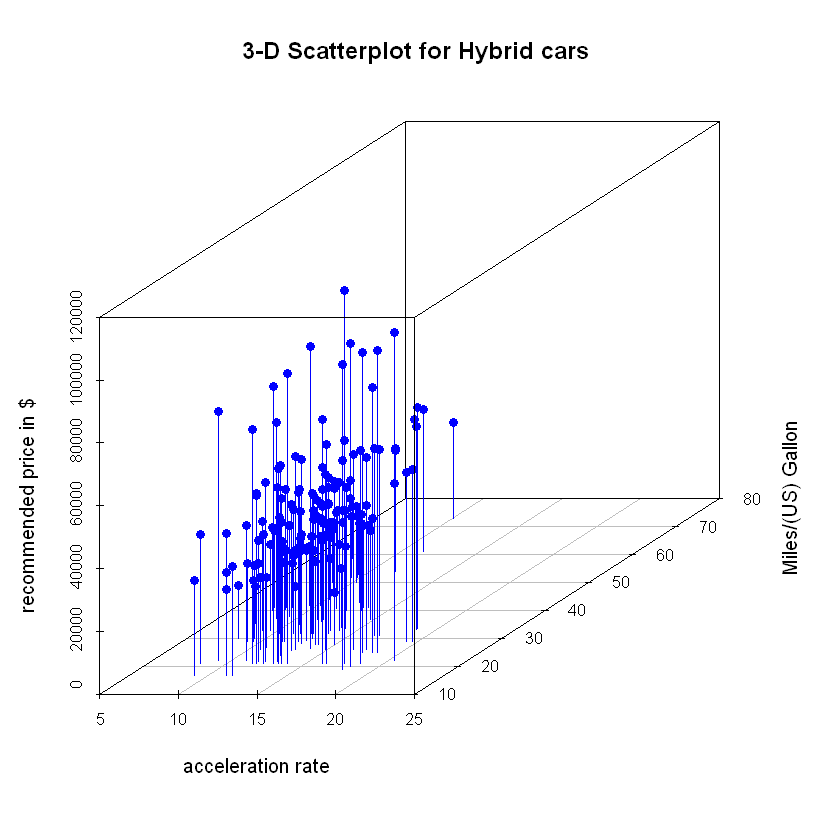

In [9]:
with (hyb,
{
   scatterplot3d(accelrate,mpg,msrp,        # x y and z axis
                 color="blue", pch=19, # filled blue circles
                 type="h",             # lines to the horizontal plane
                 main="3-D Scatterplot for Hybrid cars ",
                 xlab="acceleration rate",
                 ylab="Miles/(US) Gallon",
                 zlab="recommended price in $")
}
)

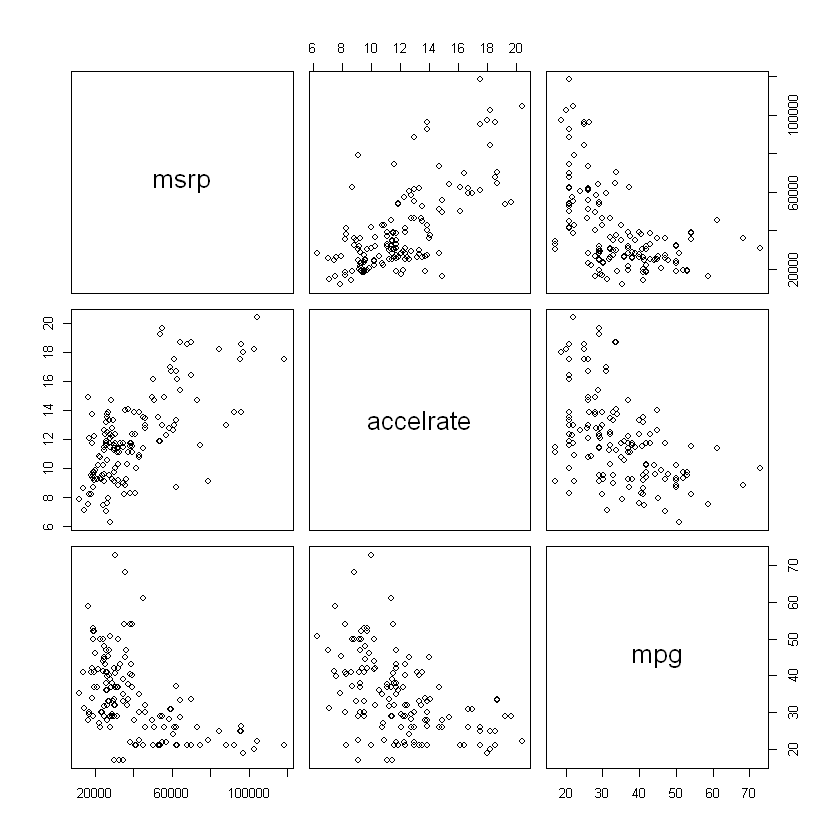

In [10]:
pairs(hyb[,4:6])

In [23]:
d1=diana(hyb[,4:6])
d1

Merge:
       [,1] [,2]
  [1,]   -7   -9
  [2,]  -79 -112
  [3,]  -71  -89
  [4,]  -29  -41
  [5,] -103 -138
  [6,]  -28  -68
  [7,]  -19  -88
  [8,]  -69  -83
  [9,]    2 -124
 [10,]  -18  -90
 [11,]  -23    3
 [12,]  -14  -78
 [13,]  -45 -122
 [14,]  -91 -121
 [15,]   -6  -97
 [16,]  -49 -153
 [17,]    8  -85
 [18,]  -46  -75
 [19,]   12 -107
 [20,] -102 -117
 [21,]  -98 -137
 [22,] -123 -150
 [23,]  -31  -50
 [24,]  -16  -51
 [25,]    1 -111
 [26,]  -44 -148
 [27,]  -21  -82
 [28,]   -5   14
 [29,]  -92 -115
 [30,] -104 -118
 [31,]   13  -80
 [32,]  -99 -125
 [33,]    4 -127
 [34,]   10  -20
 [35,]   17  -70
 [36,]  -26 -136
 [37,]  -34  -77
 [38,]   -4   15
 [39,]  -53 -141
 [40,]   11 -105
 [41,]  -36 -100
 [42,]    6  -73
 [43,] -126 -139
 [44,]   16    5
 [45,]  -39   20
 [46,]  -59  -63
 [47,]   31  -87
 [48,]  -84   29
 [49,]   19  -72
 [50,]  -93   30
 [51,]   21   22
 [52,]   -1 -113
 [53,]  -12   34
 [54,]   23  -43
 [55,]   24  -86
 [56,]   38   25
 [57,]  -52  -81
 [58,] 

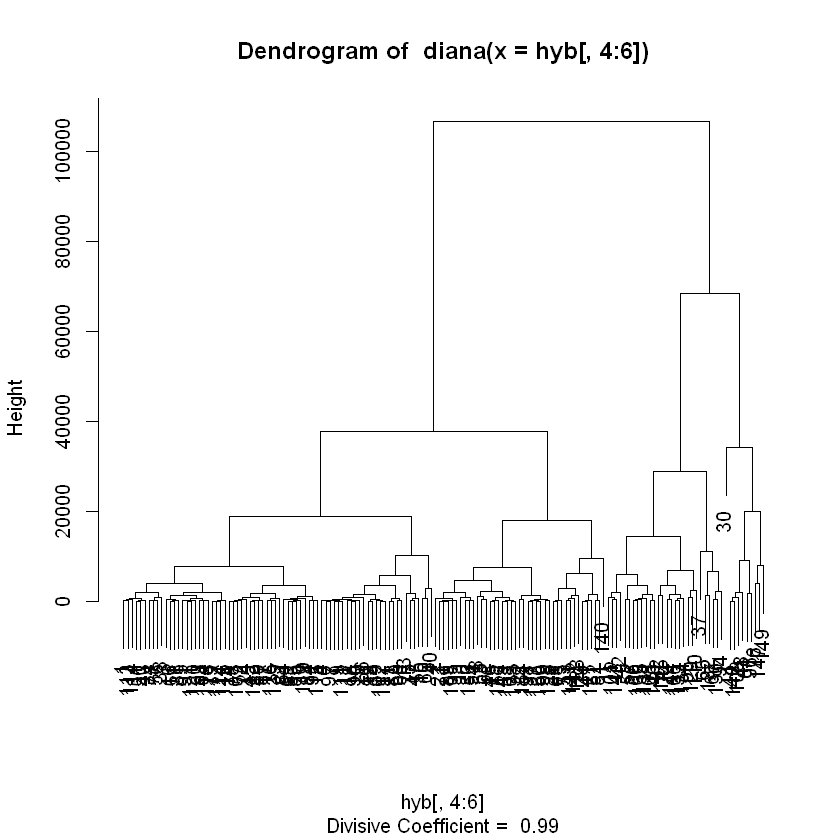

In [24]:
plot(d1, which.plots=2)

In [12]:
dclass= cutree(d1, k=3)
table(dclass)

dclass
  1   2   3 
115  28  10 

In [15]:
head(hyb[,4:6])

msrp,accelrate,mpg
24509.74,7.46,41.26
35354.97,8.20,54.10
26832.25,7.97,45.23
18936.41,9.52,53.00
25833.38,7.04,47.04
19036.71,9.52,53.00


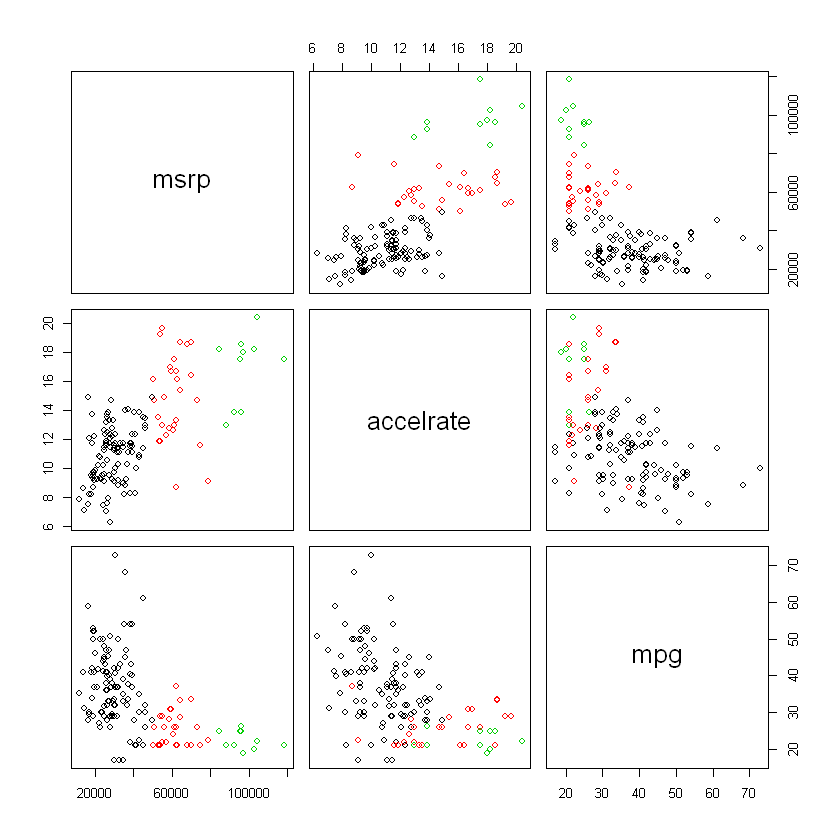

In [13]:
pairs(hyb[,4:6], col=dclass)

In [ ]:
#scatterplot matrix throws up a surprising result. We seethat the clusters are completely determined by price.
#Of course this makes sense, as we forgot to standardise the data. The variable msrp is far larger inscale
#than the other variables and dominates the analysis.

In [31]:
#First we standardise the data, and then rerun diana.
shyb=scale(hyb[, 4:6])
head(shyb)

msrp,accelrate,mpg
-0.6913593,-1.5299840,0.5889757
-0.1850727,-1.2783026,1.7591715
-0.5829378,-1.3565279,0.9507886
-0.9515384,-0.8293573,1.6589211
-0.6295680,-1.6728303,1.1157461
-0.9468561,-0.8293573,1.6589211


In [26]:
d2=diana(shyb)
head(d2)

$order
  [1]   1  16   3  10  19  40   8  47  79 113  66  88 102  78 137   4   6   9
 [19]   7  18  12  77  97 111  13  43 114  26  98 150 115   2   5  85  82  46
 [37]  49  81  54  80  11  24  72  31 107 125  17  69 126  83  33  34 124  59
 [55]  20  38  56  50  84  23  55 139  86  60  63  21  51  27  87  93  39  92
 [73]  58  64  45 151  70 120 121  91 122  62 103 153  89 105  99 123  71  68
 [91] 138 152  90 117 104 118 119 112 116 136  14  53  22  35  28 142  75  36
[109]  15  42 146  32 133 134  74 135  52 110 141  29  41 127  73 128 129 140
[127] 145  25 106 144 101 143 108  57  65  95 100 130 131  37 132  30  48  96
[145] 109 148  61  44  76 149  67  94 147

$height
  [1] 0.155420566 0.491863619 0.743192317 0.229750776 1.145722657 1.397516284
  [7] 1.011545074 0.340364261 0.208832205 0.491548328 0.140650424 0.098285148
 [13] 0.703746779 0.223790141 1.835484959 0.009364587 0.004682294 0.065295926
 [19] 0.113691371 0.152706557 0.439044610 0.179460687 0.282596857 0.654280097
 [25] 

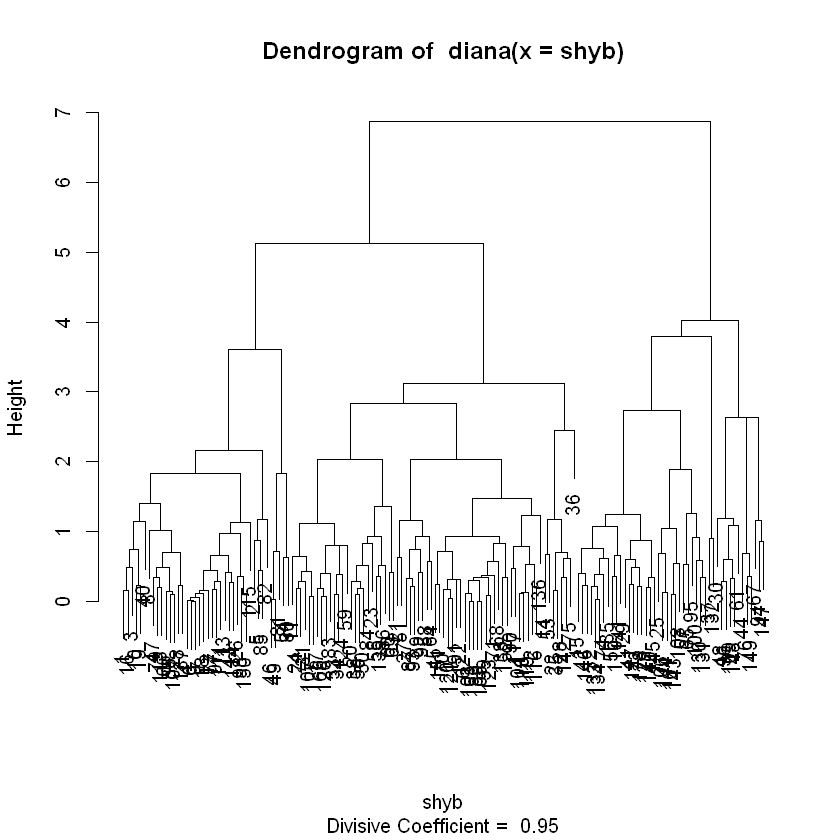

In [30]:
plot(d2,which.plots=2)  

In [32]:
dclass1= cutree(d2, k=4)
dclass1
table(dclass1)

[1] 1 1 1 1 1 1 1 1 1 1 2 1 1 2 3 1 2 1 1 2 2 2 2 2 3 1 2 2 3 4 2 3 2 2 2 2 3
 [38] 2 2 1 3 3 1 4 2 1 1 4 1 2 2 3 2 1 2 2 3 2 2 2 4 2 2 2 3 1 4 2 2 2 2 2 3 3
 [75] 2 4 1 1 1 1 1 1 2 2 1 2 2 1 2 2 2 2 2 4 3 4 1 1 2 3 3 1 2 2 2 3 2 3 4 3 1
[112] 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 1 2 2 3 3 2 3 3 3 3 4 4
[149] 4 1 2 2 2

dclass1
 1  2  3  4 
40 68 33 12 

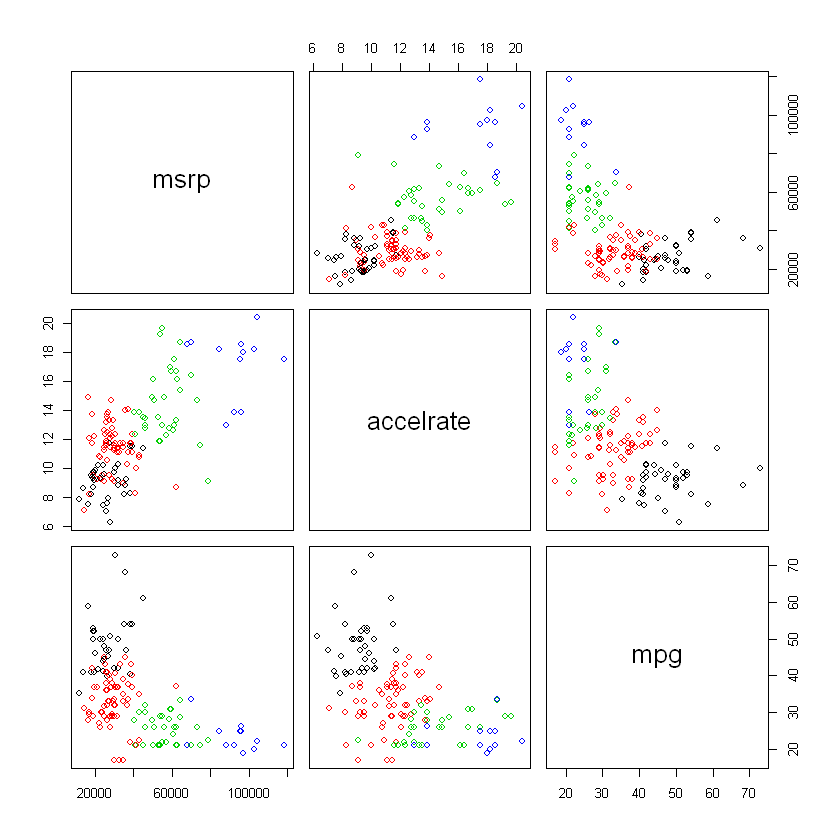

In [33]:
pairs(hyb[,4:6], col=dclass1)

In [34]:
dclass2= cutree(d2, k=6)
table(dclass2)

dclass2
 1  2  3  4  5  6 
35 68 31 12  2  5 

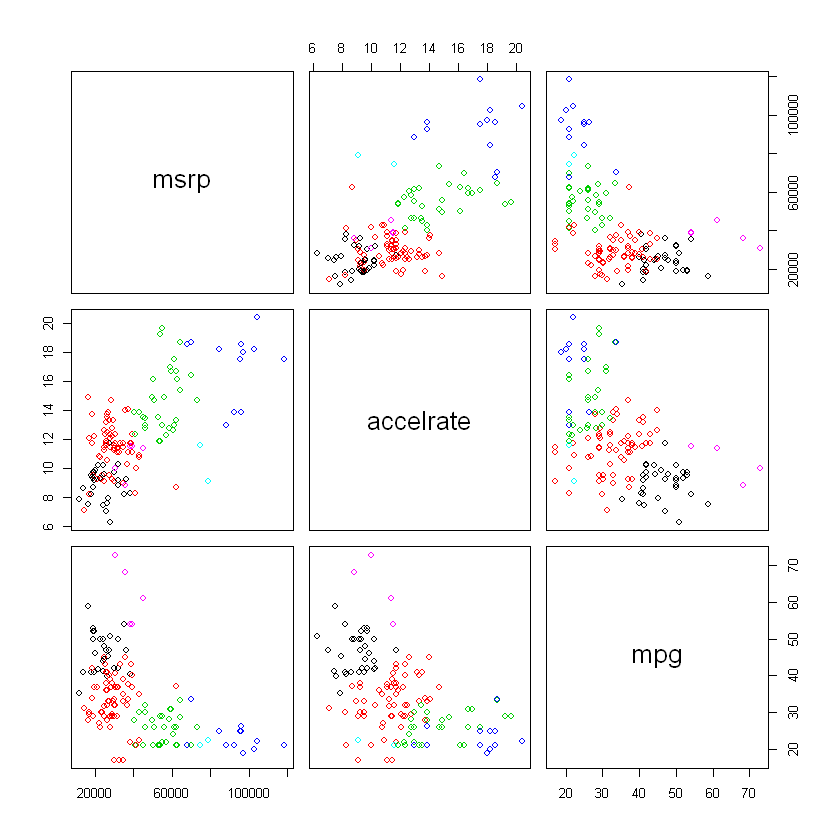

In [35]:
pairs(hyb[,4:6], col=dclass2)

In [ ]:
#small outlier grouos being identified.
#We now try kmeans. We first fit the best of 200 replications, trying from 2 clusters to ten clusters. 
#We then plotthe total within sums of squars against k - an elbow plot.

In [39]:
k.max=10

wss <- sapply(1:k.max, 
              function(k){
kmeans(shyb, k, nstart=200,iter.max = 20 )$tot.withinss
                  
})
wss

[1] 456.00000 227.23989 155.99014 121.20218 103.76018  86.41923  76.58537
 [8]  68.81041  61.63128  54.08474

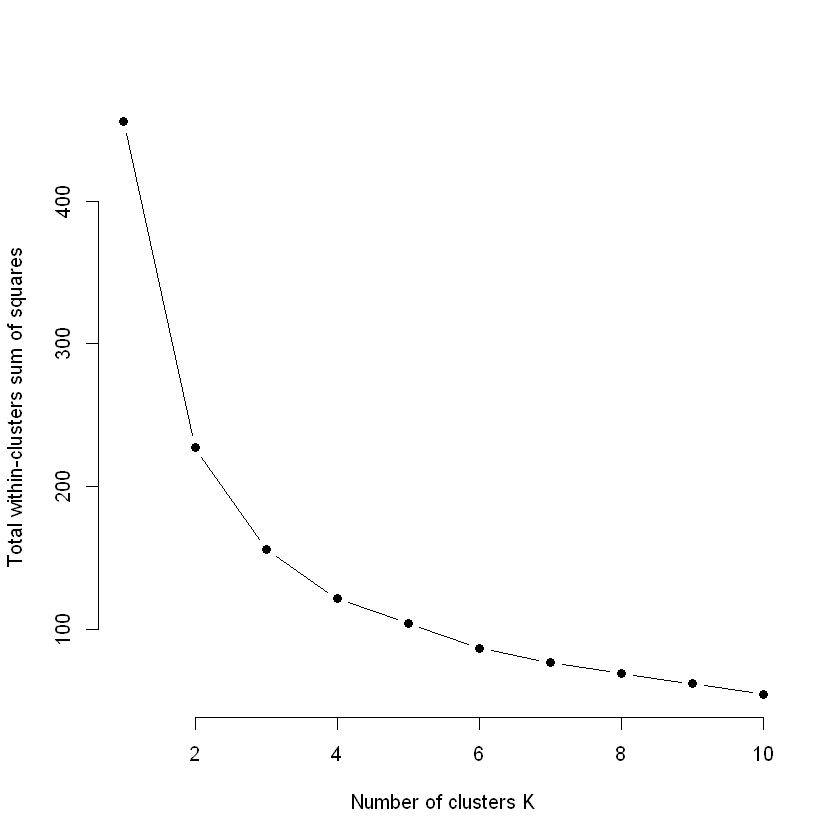

In [40]:
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [ ]:
#The plot looks very smooth, with no sudden changes of direction (elbow). It is hard to judge how many clusters 
#from this plot. We try the NbClust function

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


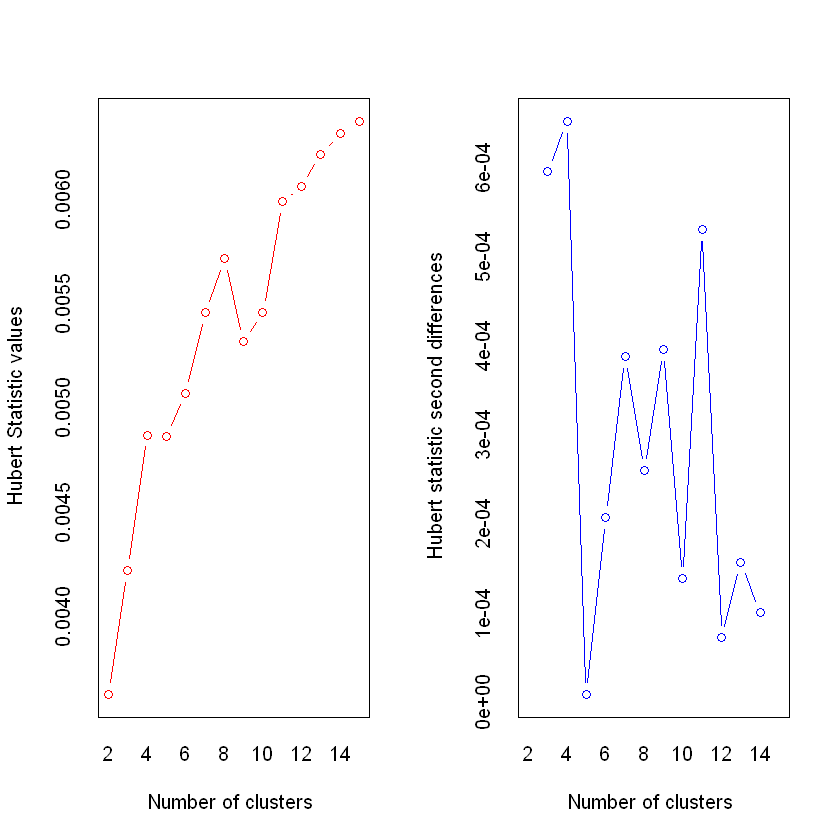

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 8 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 4 proposed 13 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


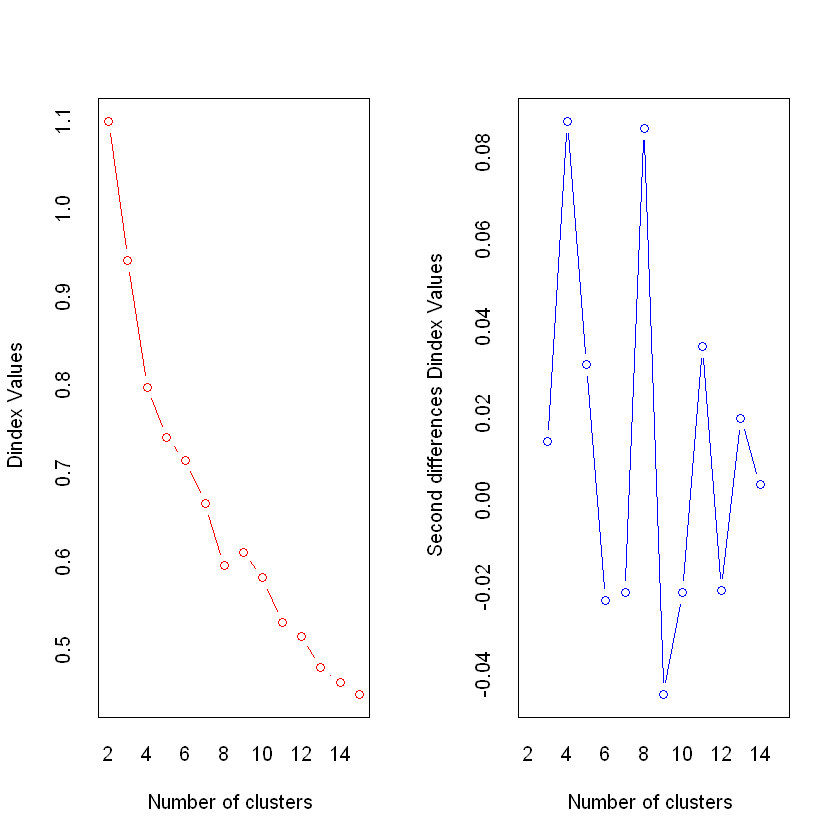

In [42]:
library(NbClust)
nb <- NbClust(shyb, diss=NULL, distance = "euclidean", 
              min.nc=2, max.nc=15, method = "kmeans", 
              index = "all", alphaBeale = 0.1)

#### 4 and 6
#Again, the various measures are contradictory. The two graphical procedures suggest either k=4 or k=8, 
#but these are not supported by other measures, which seem to support k=2. We look at the k=4 solution, 
#but we need to consider k=2.

In [54]:
k4$centers

,msrp,accelrate,mpg
1,-0.6324189,-0.9088035,1.297715813
2,-0.5297278,-0.1454573,-0.008821604
3,0.5084822,0.1263520,-1.006160421
4,1.8140551,1.7619857,-0.864695055


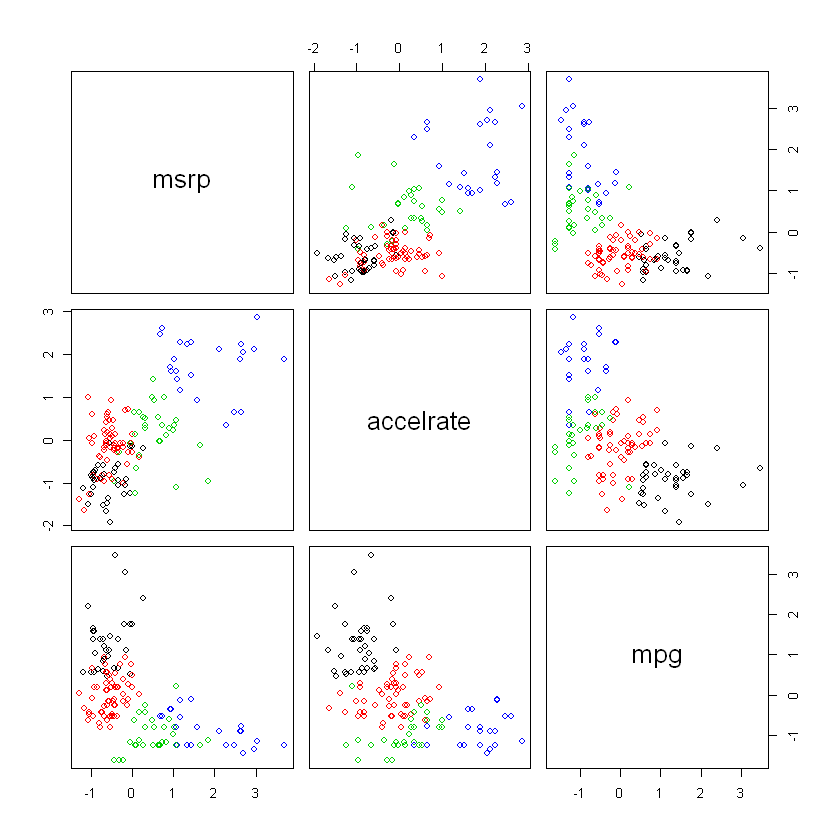

In [43]:
k4=kmeans(shyb, 4, nstart=200,iter.max = 20 )
pairs(shyb, col=k4$cluster)

In [44]:
library(mclust)

Warning message:
"package 'mclust' was built under R version 3.4.3"Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.


In [45]:
mc=Mclust(shyb)
mc

'Mclust' model object:
 best model: ellipsoidal, equal shape (VEV) with 2 components

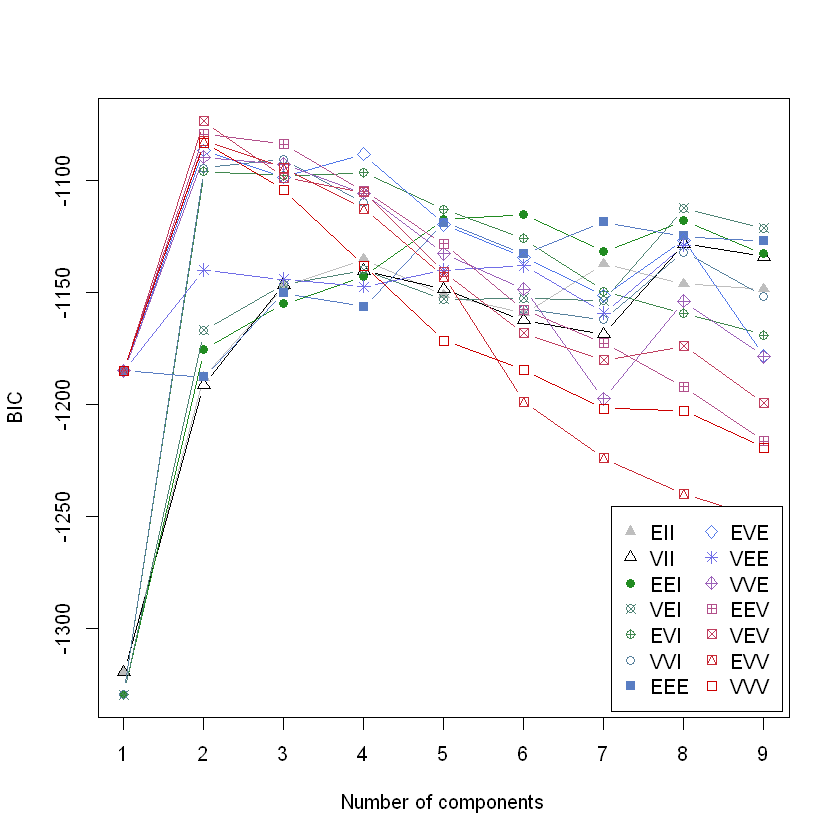

In [46]:
plot(mc, what="BIC")

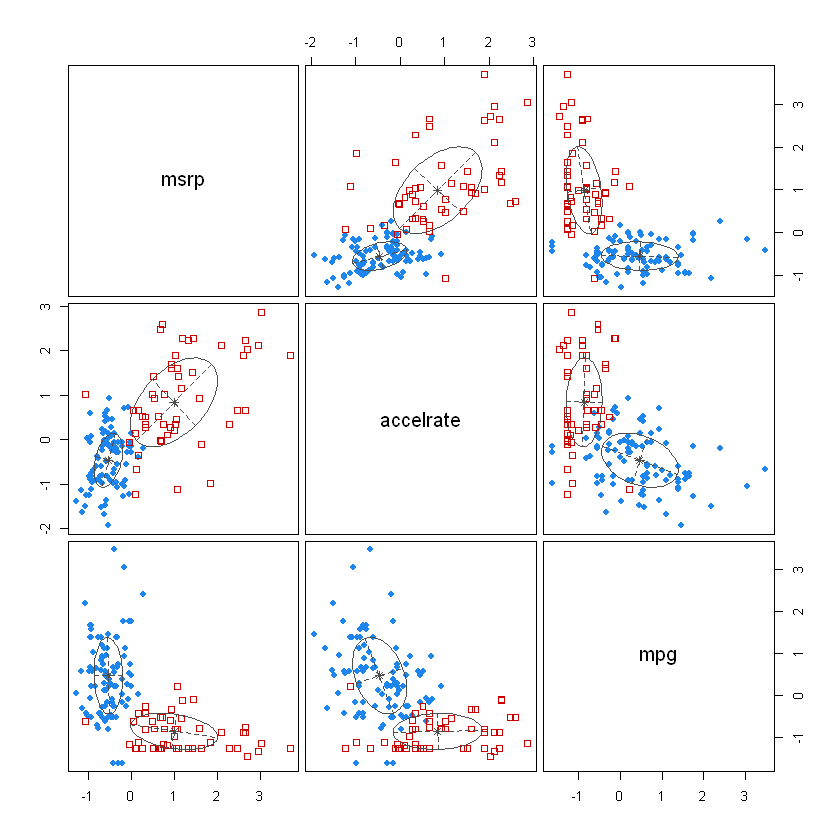

In [47]:
plot(mc, what="classification")

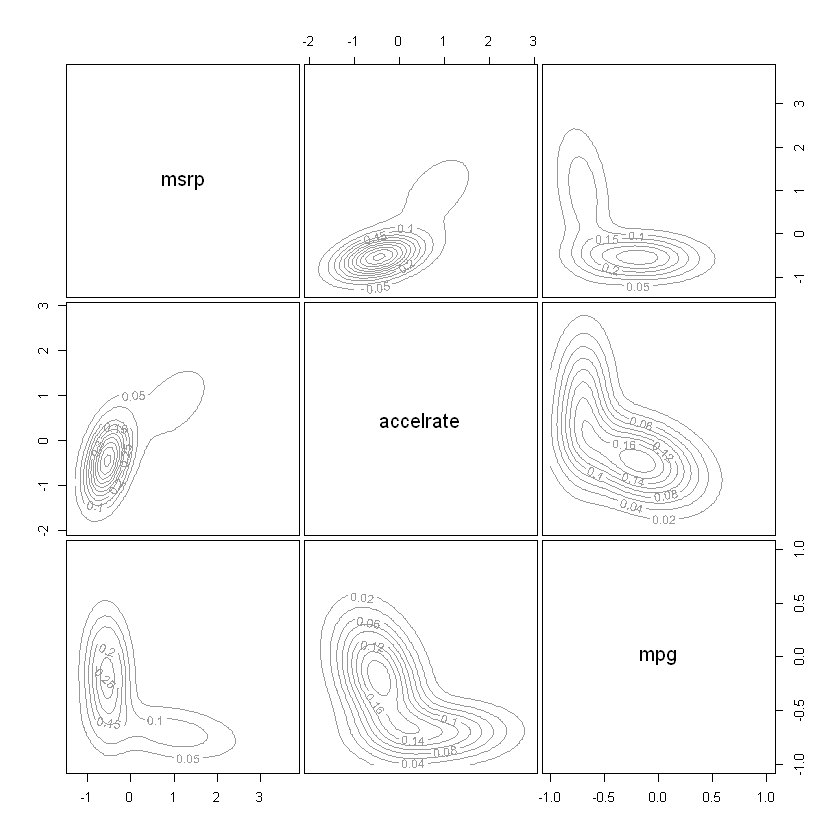

In [48]:
plot(mc, what="density")

In [51]:
hyb$carclass

[1] C   C   C   TS  C   TS  TS  MV  TS  C   SUV TS  M   PT  SUV C   SUV TS 
 [19] C   SUV M   PT  SUV M   M   MV  M   SUV SUV M   SUV SUV M   SUV PT  M  
 [37] SUV M   M   M   SUV SUV C   L   M   C   C   SUV M   M   SUV SUV SUV C  
 [55] TS  M   SUV SUV SUV M   L   M   C   M   SUV C   M   C   SUV M   C   SUV
 [73] SUV SUV PT  L   C   C   C   M   C   MV  M   M   MV  M   SUV C   M   TS 
 [91] M   M   SUV SUV SUV M   C   M   C   M   M   C   C   M   M   M   M   M  
[109] L   SUV C   C   C   M   M   L   C   M   M   M   M   M   M   M   M   M  
[127] SUV SUV SUV SUV SUV SUV SUV SUV SUV M   C   M   C   C   PT  PT  M   M  
[145] M   M   L   L   L   M   M   M   C  
Levels: C L M MV PT SUV TS

In [52]:
mc$classification

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 2 2 1 2 1 1 1 2 2
 [38] 1 1 1 2 2 1 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2
 [75] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 1 2 1 2 2 2 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2
[149] 2 1 1 1 1

In [53]:
table(mc$classification, hyb$carclass)

   
     C  L  M MV PT SUV TS
  1 31  1 42  4  3  13  8
  2  1  7 14  0  3  26  0